# 1. Importing Dependencies and Loading Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [2]:
df = sns.load_dataset('diamonds')

In [3]:
df.to_csv("diamonds.csv",index=False)

# 2. Exploratory Data Analysis

In [4]:
print(tabulate(df.describe().T,headers=df.describe().T.columns,tablefmt="psql"))

+-------+---------+------------+-------------+-------+--------+---------+---------+----------+
|       |   count |       mean |         std |   min |    25% |     50% |     75% |      max |
|-------+---------+------------+-------------+-------+--------+---------+---------+----------|
| carat |   53940 |    0.79794 |    0.474011 |   0.2 |   0.4  |    0.7  |    1.04 |     5.01 |
| depth |   53940 |   61.7494  |    1.43262  |  43   |  61    |   61.8  |   62.5  |    79    |
| table |   53940 |   57.4572  |    2.23449  |  43   |  56    |   57    |   59    |    95    |
| price |   53940 | 3932.8     | 3989.44     | 326   | 950    | 2401    | 5324.25 | 18823    |
| x     |   53940 |    5.73116 |    1.12176  |   0   |   4.71 |    5.7  |    6.54 |    10.74 |
| y     |   53940 |    5.73453 |    1.14213  |   0   |   4.72 |    5.71 |    6.54 |    58.9  |
| z     |   53940 |    3.53873 |    0.705699 |   0   |   2.91 |    3.53 |    4.04 |    31.8  |
+-------+---------+------------+-------------+----

In [5]:
print(df.columns.values)

['carat' 'cut' 'color' 'clarity' 'depth' 'table' 'price' 'x' 'y' 'z']


In [6]:
pd.DataFrame(df.dtypes,columns=['Type']).T

,carat,cut,color,clarity,depth,table,price,x,y,z
Type,float64,object,object,object,float64,float64,int64,float64,float64,float64


In [7]:
df['cut'] = df['cut'].astype(CategoricalDtype(categories=['Fair','Good','Very Good','Premium','Ideal'],ordered=True))
color_categories = sorted(df['color'].unique(),reverse=True)
df['color'] = df['color'].astype(CategoricalDtype(categories=color_categories,ordered=True))
df['clarity'] = df['clarity'].astype(CategoricalDtype(categories=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'])) 

In [8]:
pd.DataFrame(df.dtypes,columns=['Type']).T

,carat,cut,color,clarity,depth,table,price,x,y,z
Type,float64,category,category,category,float64,float64,int64,float64,float64,float64


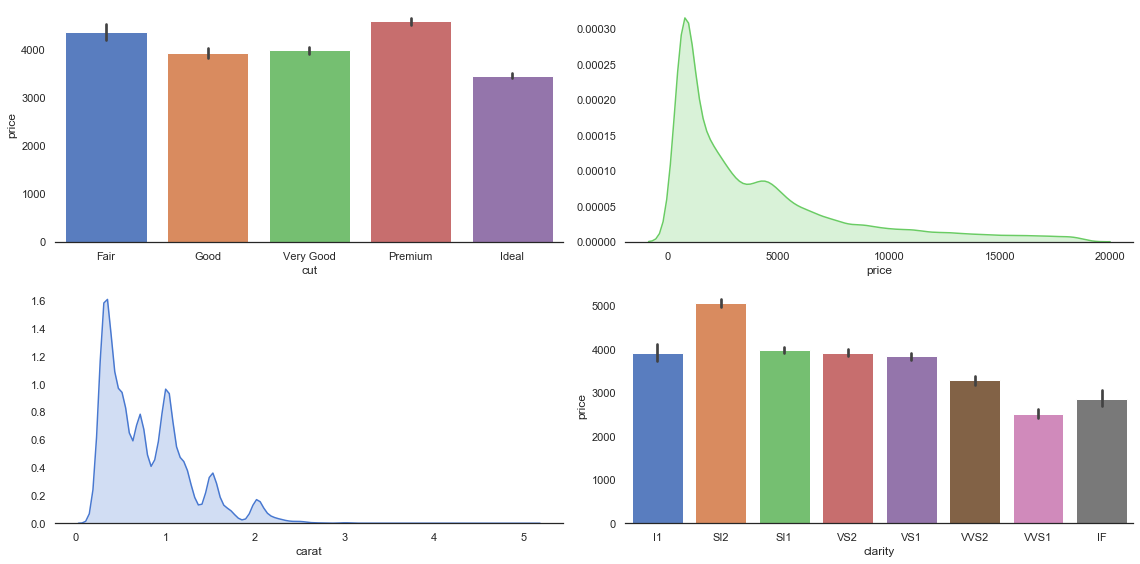

In [9]:
sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(16, 8), sharex=False)
sns.despine(left=True)

sns.barplot(x='cut',y='price',data=df, ax=axes[0, 0]);
# Plot a filled kernel density estimate
sns.distplot(df['price'], hist=False, color="g", kde_kws={"shade": True}, ax=axes[0, 1]);
# Plot a filled kernel density estimate
sns.distplot(df['carat'], hist=False, color="b", kde_kws={"shade": True}, ax=axes[1, 0]);
sns.barplot(x='clarity',y='price',data=df, ax=axes[1, 1]);

#plt.setp(axes, yticks=[])
plt.tight_layout()

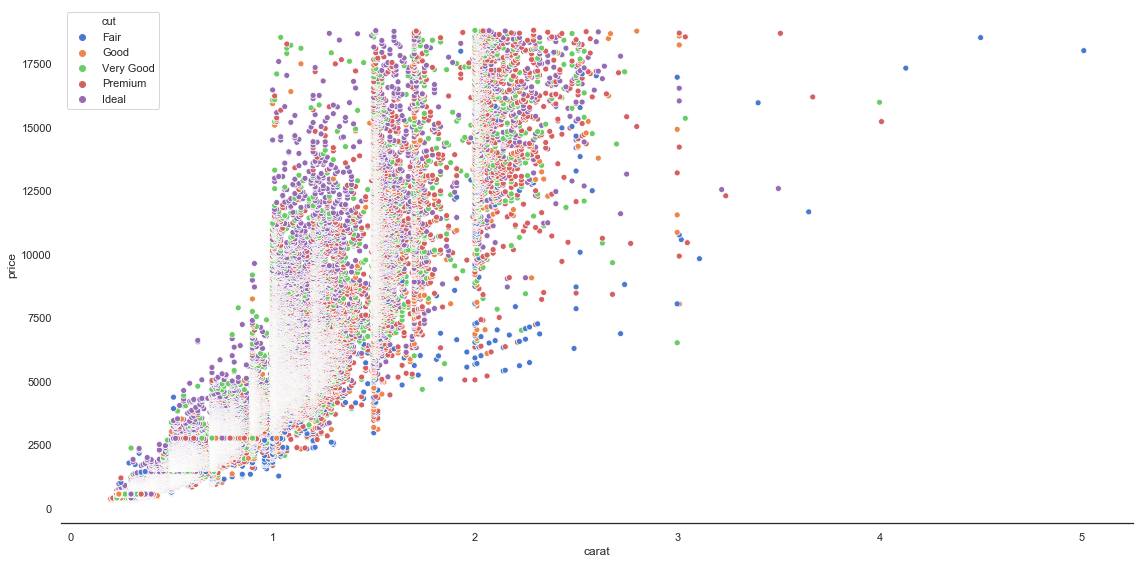

In [10]:
sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(1, 1, figsize=(16, 8), sharex=False)
sns.despine(left=True)

# Add a Regression line to see the correlation btw bmi and charges
sns.scatterplot(x=df['carat'], y=df['price'], hue=df['cut'], ax=axes)
#sns.regplot(x=df['depth'], y=df['price'], ax=axes[1])
#sns.regplot(x=df['table'], y=df['price'], ax=axes[2])


#plt.setp(axes, yticks=[])
plt.tight_layout()

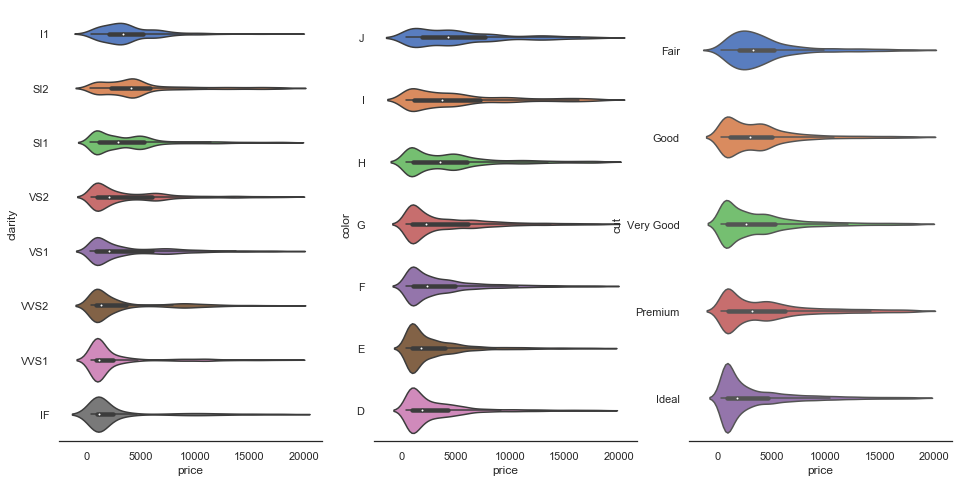

In [11]:
sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes_cat = plt.subplots(1, 3, figsize=(16, 8), sharex=True)
sns.despine(left=True)

# Add a Regression line to see the correlation btw bmi and charges
sns.catplot(x="price", y="clarity", kind="violin", data=df, ax=axes_cat[0]);
plt.close(2)
sns.catplot(x="price", y="color", kind="violin", data=df, ax=axes_cat[1]);
plt.close(2)
sns.catplot(x="price", y="cut", kind="violin", data=df, ax=axes_cat[2]);
plt.close(2)
#plt.setp(axes, yticks=[])
#plt.tight_layout()


In [31]:
?sns.distplot

In [12]:
pd.concat([df.loc[df['price'] == df['price'].max()],
           df.loc[df['carat'] == df['carat'].max()],
           df.loc[df['depth'] == df['depth'].max()]])

,carat,cut,color,clarity,depth,table,price,x,y,z
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
52860,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09
52861,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09


In [13]:
pd.DataFrame(df.groupby(['cut','color'])["price"].mean().unstack())
#pd.DataFrame(df.groupby(['cut','color','clarity'])["price"].mean().unstack())

color,J,I,H,G,F,E,D
cut,,,,,,,
Fair,4975.655462,4685.445714,5135.683168,4239.254777,3827.003205,3682.312500,4291.061350
Good,4574.172638,5078.532567,4276.254986,4123.482204,3495.750275,3423.644159,3405.382175
Very Good,5103.513274,5255.879568,4535.390351,3872.753806,3778.820240,3214.652083,3470.467284
Premium,6294.591584,5946.180672,5216.706780,4500.742134,4324.890176,3538.914420,3631.292576
Ideal,4918.186384,4451.970377,3889.334831,3720.706388,3374.939362,2597.550090,2629.094566


# 3. Necessary Preprocessing and ML Models

### Creating Dummy Variable for Categorical Features

In [14]:
cut_dummy = pd.get_dummies(df["cut"],columns=df['cut'].unique())
color_dummy = pd.get_dummies(df["color"],columns=df['color'].unique())
clarity_dummy = pd.get_dummies(df["clarity"],columns=df['clarity'].unique())

df = pd.concat([df, cut_dummy, color_dummy, clarity_dummy],axis=1)

In [15]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'Fair', 'Good', 'Very Good', 'Premium', 'Ideal', 'J', 'I', 'H',
       'G', 'F', 'E', 'D', 'I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1',
       'IF'],
      dtype='object')

### Creating Train, Dev and Test Sets

In [16]:
# Dropping Categorical Variables.
# Dropping Depth, Table, X, Y, Z Features since they are not main contributor to price.
X = df.drop(["cut", "color", "clarity", "depth", "table", "x", "y", "z", "price"],axis=1)
y = df['price']

In [17]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=47, shuffle=True)
X_train, X_dev, y_train, y_dev = train_test_split(X_train_temp, y_train_temp, test_size=0.15, random_state=8, shuffle=True)

In [18]:
print(str([X_train.shape,y_train.shape]) +"\n"+\
      str([X_dev.shape,y_dev.shape]) +"\n"+\
      str([X_test.shape,y_test.shape])
     )

[(38971, 21), (38971,)]
[(6878, 21), (6878,)]
[(8091, 21), (8091,)]


## A. Linear Regression

In [19]:
linreg = LinearRegression(fit_intercept=False)
linreg.fit(X_train, y_train)

#To retrieve the intercept:
    #print(linreg.intercept_)
#For retrieving the slope:
    #print(linreg.coef_)
y_pred_linreg_dev = linreg.predict(X_dev)

In [20]:
df_linreg = pd.DataFrame({'Actual': y_dev, 'Predicted': y_pred_linreg_dev})
df_linreg

,Actual,Predicted
48712,2010,2970.048193
30948,449,-1068.836534
13340,5504,6691.974896
50912,2318,3147.979051
9546,4620,4799.224275
...,...,...
9313,4578,5191.255922
16846,6720,6408.736576
7826,4297,4359.720418
31202,756,39.612874


In [21]:
print('Root Mean Squared Error for Linear Regression:', np.sqrt(metrics.mean_squared_error(y_dev, y_pred_linreg_dev)))
print("Accuracy: "+ str(linreg.score(X_dev,y_dev)*100) + "%")

Root Mean Squared Error for Linear Regression: 1155.9995302945968
Accuracy: 91.4540910524475%


## B. Decision Tree Regression

In [22]:
dt = DecisionTreeRegressor(max_depth=10, min_samples_split=5, max_leaf_nodes=40)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_dev)
df_dt = pd.DataFrame({'Actual': y_dev, 'Predicted': y_pred_dt})
df_dt

,Actual,Predicted
48712,2010,2711.234342
30948,449,786.848022
13340,5504,6138.855655
50912,2318,2711.234342
9546,4620,4319.956522
...,...,...
9313,4578,4319.956522
16846,6720,6138.855655
7826,4297,4319.956522
31202,756,786.848022


In [23]:
print('Root Mean Squared Error for Decision Tree Regression:', np.sqrt(metrics.mean_squared_error(y_dev, y_pred_dt)))
print("Accuracy: "+ str(dt.score(X_dev,y_dev)*100) + "%")

Root Mean Squared Error for Decision Tree Regression: 902.0700938570558
Accuracy: 94.79616502072774%


In [24]:
import subprocess
import sys
import os

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

install('pydotplus')
install('graphviz')


In [25]:
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=X_train.columns, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)
    Showing_Image=Image(graph.create_png())
    return Showing_Image

In [26]:
tree_graph_to_png(tree=dt, feature_names=X_train.columns, 
                  png_file_to_save='dec_tree.png')

InvocationException: GraphViz's executables not found

## 3. Random Forest Regression

In [27]:
rf = RandomForestRegressor(max_depth = 20, n_estimators=10, random_state = 42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_dev)
df_rf = pd.DataFrame({'Actual': y_dev, 'Predicted': y_pred_rf})
df_rf

,Actual,Predicted
48712,2010,2309.287314
30948,449,557.171914
13340,5504,6727.575147
50912,2318,2446.937222
9546,4620,4343.211551
...,...,...
9313,4578,4421.286605
16846,6720,6562.108265
7826,4297,4234.109064
31202,756,678.103503


In [28]:
print('Root Mean Squared Error for Random Forest Regression:', np.sqrt(metrics.mean_squared_error(y_dev, y_pred_rf)))
print("Accuracy: "+ str(rf.score(X_dev,y_dev)*100) + "%")

Root Mean Squared Error for Random Forest Regression: 606.0750540218768
Accuracy: 97.65093105322481%
